In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
df = pd.read_csv('GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv')
df = df.dropna()
df = df.sort_values(by=['Country','dt'], ascending=True)
df = df.reset_index(drop=True)
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1838-04-01,13.008,2.586,Afghanistan
1,1838-06-01,23.950,2.510,Afghanistan
2,1838-07-01,26.877,2.883,Afghanistan
3,1838-08-01,24.938,2.992,Afghanistan
4,1838-09-01,18.981,2.538,Afghanistan
...,...,...,...,...
544806,2013-04-01,1.701,0.543,Åland
544807,2013-05-01,10.327,0.612,Åland
544808,2013-06-01,14.068,0.423,Åland
544809,2013-07-01,16.447,0.483,Åland


In [3]:
countries = list(set(df['Country']))
countries.sort()

In [4]:
world = pd.read_csv('world-regions-according-to-maddison.csv')
world = world.rename(columns={'Entity': 'Country'})
world

,Country,Code,World regions according to Maddison (Maddison (2010))
0,Afghanistan,AFG,East Asia Maddison definition
1,Albania,ALB,Eastern Europe Maddison definition
2,Algeria,DZA,Africa Maddison definition
3,American Samoa,ASM,East Asia Maddison definition
4,Andorra,AND,Western Europe Maddison definition
...,...,...,...
218,Wallis and Futuna,WLF,East Asia Maddison definition
219,Yemen,YEM,Western Asia Maddison definition
220,Yugoslavia,OWID_YGS,Eastern Europe Maddison definition
221,Zambia,ZMB,Africa Maddison definition


In [5]:
df = pd.merge(df,world)
df = df[['Country', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'World regions according to Maddison (Maddison (2010))']]
df

,Country,dt,AverageTemperature,AverageTemperatureUncertainty,World regions according to Maddison (Maddison (2010))
0,Afghanistan,1838-04-01,13.008,2.586,East Asia Maddison definition
1,Afghanistan,1838-06-01,23.950,2.510,East Asia Maddison definition
2,Afghanistan,1838-07-01,26.877,2.883,East Asia Maddison definition
3,Afghanistan,1838-08-01,24.938,2.992,East Asia Maddison definition
4,Afghanistan,1838-09-01,18.981,2.538,East Asia Maddison definition
...,...,...,...,...,...
423625,Zimbabwe,2013-04-01,21.142,0.495,Africa Maddison definition
423626,Zimbabwe,2013-05-01,19.059,1.022,Africa Maddison definition
423627,Zimbabwe,2013-06-01,17.613,0.473,Africa Maddison definition
423628,Zimbabwe,2013-07-01,17.000,0.453,Africa Maddison definition


In [6]:
df = df.rename(columns={'dt':'date'})
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
df

,Country,date,AverageTemperature,AverageTemperatureUncertainty,World regions according to Maddison (Maddison (2010))
0,Afghanistan,1838-04-01,13.008,2.586,East Asia Maddison definition
1,Afghanistan,1838-06-01,23.950,2.510,East Asia Maddison definition
2,Afghanistan,1838-07-01,26.877,2.883,East Asia Maddison definition
3,Afghanistan,1838-08-01,24.938,2.992,East Asia Maddison definition
4,Afghanistan,1838-09-01,18.981,2.538,East Asia Maddison definition
...,...,...,...,...,...
423625,Zimbabwe,2013-04-01,21.142,0.495,Africa Maddison definition
423626,Zimbabwe,2013-05-01,19.059,1.022,Africa Maddison definition
423627,Zimbabwe,2013-06-01,17.613,0.473,Africa Maddison definition
423628,Zimbabwe,2013-07-01,17.000,0.453,Africa Maddison definition


In [13]:
def graph_generator(c):
    file = df[df.Country == c]
    dates = file.sort_values('date', ascending= False)
    dates = dates.iloc[0,1].year
    file_old = file[(file['date'] < pd.to_datetime('2000-01-01')) & (file['date'] >= pd.to_datetime('1900-01-01'))]
    file_old = file_old.reset_index(drop = True)
    month = 1
    store = [0]*12
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    while month <=12:
        temp = {}
        for x in file_old.values:
            if x[1].month == month:
                if x[2] in temp:
                    temp[x[2]] += 1
                else:
                    temp[x[2]] = 1
        sum = 0
        tot = 0
        for x in temp:
            sum += x*temp[x]
            tot += temp[x]
        store[month - 1] = sum/tot if tot >0 else sum
        month += 1
    country_base = pd.DataFrame(columns=['Month', 'AvgTemperature'])
    country_base['Month'] = months
    country_base['AvgTemperature'] = store
    country_base.style.set_caption("2000")
    print(f'\t2000 {c}\n',country_base)
    plt.plot(country_base['Month'], country_base['AvgTemperature'])
    plt.title(f'{c}')
    plt.show()
    country_new = pd.DataFrame(columns=['Month'])
    country_new['Month'] = months
    for y in range(2000, dates+1,1):
        file_new = file[(file['date'] >= pd.to_datetime(f'{y}-01-01')) & (file['date'] < pd.to_datetime(f'{y+1}-01-01'))]
        store = [0]*12
        month = 1
        while month <=12:
            temp = {}
            for x in file_new.values:
                if x[1].month == month:
                    if x[2] in temp:
                        temp[x[2]] += 1
                    else:
                        temp[x[2]] = 1
            sum = 0
            tot = 0
            for x in temp:
                sum += x*temp[x]
                tot += temp[x]
            store[month - 1] = sum/tot if tot >0 else sum
            month += 1
        country_new[f'{y}'] = store
    #print(country_new)
    return pd.merge(country_base,country_new, on='Month')

	2000 Greenland
    Month  AvgTemperature
0    Jan       -30.44634
1    Feb       -30.26302
2    Mar       -28.49043
3    Apr       -22.26343
4    May       -11.74661
5    Jun        -4.48739
6    Jul        -1.67075
7    Aug        -4.10004
8    Sep       -11.28306
9    Oct       -20.15155
10   Nov       -26.06206
11   Dec       -29.46958


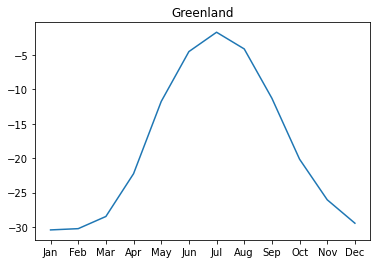

,Month,AvgTemperature,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Jan,-30.44634,-28.537,-30.275,-28.245,-27.264,-29.397,-27.918,-29.471,-29.051,-32.063,-27.157,-27.314,-26.166,-27.880,-26.875
1,Feb,-30.26302,-29.210,-30.301,-32.970,-27.843,-28.995,-24.265,-28.610,-25.111,-29.120,-29.237,-25.840,-25.560,-29.103,-29.726
2,Mar,-28.49043,-28.431,-29.265,-28.841,-25.596,-27.932,-22.811,-25.556,-26.959,-28.065,-29.643,-26.343,-27.784,-28.943,-24.419
3,Apr,-22.26343,-18.924,-22.102,-22.799,-20.477,-18.905,-20.569,-20.061,-20.894,-20.922,-22.668,-19.518,-23.745,-20.614,-20.730
4,May,-11.74661,-12.289,-12.439,-10.012,-10.834,-10.109,-10.020,-10.041,-12.446,-10.840,-10.073,-8.585,-11.410,-10.866,-12.541
5,Jun,-4.48739,-3.605,-4.205,-3.181,-3.042,-3.848,-3.039,-4.780,-3.085,-2.368,-4.512,-3.255,-3.436,-3.243,-3.474
6,Jul,-1.67075,-1.184,-1.379,-1.428,-0.067,-1.767,-0.401,-1.154,-0.652,-0.053,0.339,-0.531,-0.168,0.305,-1.292
7,Aug,-4.10004,-3.574,-2.790,-3.629,-2.222,-2.788,-3.387,-2.990,-2.580,-2.858,-2.681,-1.700,-2.585,-2.263,-4.221
8,Sep,-11.28306,-10.359,-9.796,-8.760,-9.071,-10.415,-11.128,-9.509,-10.799,-9.949,-11.160,-8.705,-10.520,-9.098,0.000
9,Oct,-20.15155,-19.969,-17.891,-15.982,-16.822,-17.418,-20.577,-18.151,-19.918,-19.765,-20.121,-17.888,-20.355,-17.988,0.000


In [14]:
graph = graph_generator('Greenland')
graph

In [9]:
data = pd.read_csv('coldest_regions.csv')
data = data['Country']
data

0         Greenland
1           Denmark
2            Russia
3            Canada
4          Mongolia
5            Norway
6           Finland
7           Iceland
8            Sweden
9        Kyrgyzstan
10       Tajikistan
11    Liechtenstein
12          Estonia
13       Kazakhstan
14           Latvia
15          Belarus
16        Lithuania
17          Austria
18            China
19      North Korea
Name: Country, dtype: object

	2000 Greenland
    Month  AvgTemperature
0    Jan       -30.44634
1    Feb       -30.26302
2    Mar       -28.49043
3    Apr       -22.26343
4    May       -11.74661
5    Jun        -4.48739
6    Jul        -1.67075
7    Aug        -4.10004
8    Sep       -11.28306
9    Oct       -20.15155
10   Nov       -26.06206
11   Dec       -29.46958


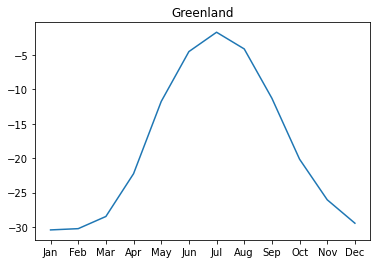

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan -28.537 -30.275 -28.245 -27.264 -29.397 -27.918 -29.471 -29.051   
1    Feb -29.210 -30.301 -32.970 -27.843 -28.995 -24.265 -28.610 -25.111   
2    Mar -28.431 -29.265 -28.841 -25.596 -27.932 -22.811 -25.556 -26.959   
3    Apr -18.924 -22.102 -22.799 -20.477 -18.905 -20.569 -20.061 -20.894   
4    May -12.289 -12.439 -10.012 -10.834 -10.109 -10.020 -10.041 -12.446   
5    Jun  -3.605  -4.205  -3.181  -3.042  -3.848  -3.039  -4.780  -3.085   
6    Jul  -1.184  -1.379  -1.428  -0.067  -1.767  -0.401  -1.154  -0.652   
7    Aug  -3.574  -2.790  -3.629  -2.222  -2.788  -3.387  -2.990  -2.580   
8    Sep -10.359  -9.796  -8.760  -9.071 -10.415 -11.128  -9.509 -10.799   
9    Oct -19.969 -17.891 -15.982 -16.822 -17.418 -20.577 -18.151 -19.918   
10   Nov -24.278 -25.629 -22.241 -23.906 -25.308 -23.642 -26.446 -24.900   
11   Dec -28.055 -25.085 -23.757 -27.931 -30.732 -26.058 -28.603 -28.495   

      2008 

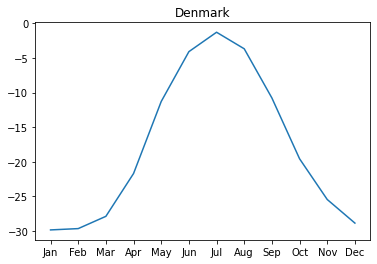

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan -27.903 -29.630 -27.623 -26.712 -28.813 -27.284 -28.895 -28.369   
1    Feb -28.538 -29.668 -32.209 -27.292 -28.357 -23.756 -28.010 -24.550   
2    Mar -27.776 -28.648 -28.171 -25.008 -27.295 -22.317 -25.044 -26.291   
3    Apr -18.371 -21.532 -22.184 -19.914 -18.357 -19.996 -19.527 -20.279   
4    May -11.776 -11.949  -9.547 -10.380  -9.670  -9.594  -9.603 -11.956   
5    Jun  -3.236  -3.842  -2.784  -2.644  -3.479  -2.679  -4.364  -2.681   
6    Jul  -0.840  -0.981  -1.042   0.316  -1.409  -0.029  -0.716  -0.305   
7    Aug  -3.177  -2.379  -3.150  -1.804  -2.358  -2.994  -2.573  -2.179   
8    Sep  -9.876  -9.333  -8.278  -8.596  -9.917 -10.605  -8.980 -10.311   
9    Oct -19.340 -17.283 -15.512 -16.342 -16.870 -19.937 -17.534 -19.332   
10   Nov -23.643 -24.999 -21.707 -23.292 -24.685 -23.035 -25.750 -24.291   
11   Dec -27.418 -24.569 -23.286 -27.297 -30.037 -25.490 -27.896 -27.853   

      2008 

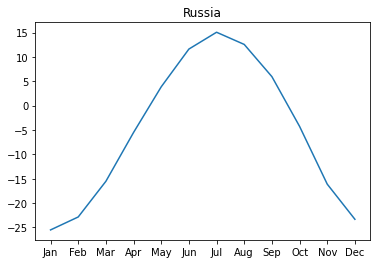

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan -25.655 -26.538 -22.833 -23.761 -23.177 -21.983 -28.437 -18.722   
1    Feb -19.527 -23.588 -18.918 -21.948 -21.720 -23.306 -22.873 -23.872   
2    Mar -13.131 -14.547 -10.623 -12.913 -14.331 -14.300 -14.475 -12.616   
3    Apr  -2.331  -4.428  -4.569  -4.313  -5.882  -3.829  -7.211  -1.383   
4    May   5.067   5.972   5.178   5.410   4.840   6.267   4.691   5.657   
5    Jun  13.247  13.061  12.978  12.098  12.218  12.988  13.619  12.267   
6    Jul  15.647  16.539  16.246  15.967  15.558  16.244  15.445  16.252   
7    Aug  13.446  13.635  12.989  13.940  12.587  13.249  12.928  14.291   
8    Sep   6.097   5.852   6.138   7.336   6.854   7.886   7.429   7.559   
9    Oct  -4.779  -4.314  -4.271  -2.528  -4.095  -1.723  -4.412  -1.774   
10   Nov -17.747 -12.580 -15.381 -16.300 -12.596 -11.928 -14.505 -13.663   
11   Dec -24.882 -22.952 -26.409 -18.982 -24.179 -21.542 -19.355 -19.697   

      2008 

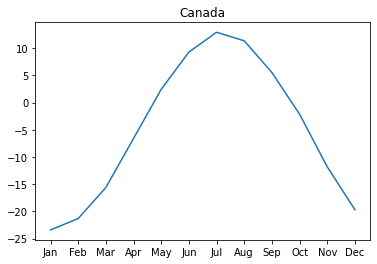

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan -22.210 -18.502 -20.977 -20.346 -24.732 -23.244 -18.206 -19.078   
1    Feb -17.843 -20.700 -20.230 -22.718 -18.592 -18.773 -17.944 -20.780   
2    Mar -11.486 -12.911 -17.842 -16.432 -15.483 -13.295 -12.267 -15.902   
3    Apr  -6.342  -5.579  -8.370  -6.427  -6.518  -3.621  -3.526  -5.161   
4    May   2.237   3.902   0.825   3.643   0.763   3.546   4.864   2.466   
5    Jun   8.958   9.826   9.976   9.689   9.078  10.221  11.387  10.084   
6    Jul  13.742  13.803  13.501  13.925  13.277  13.042  14.085  14.556   
7    Aug  11.694  12.620  11.653  12.590  10.843  11.811  12.305  11.425   
8    Sep   5.415   7.400   6.774   6.932   5.698   6.345   7.262   5.512   
9    Oct  -1.769  -1.773  -2.562  -0.087  -1.986  -0.375  -0.735  -0.686   
10   Nov  -9.952  -9.540 -10.319 -10.920 -10.535  -9.444 -12.198 -11.498   
11   Dec -20.755 -15.747 -14.783 -16.163 -20.890 -15.918 -14.549 -19.669   

      2008 

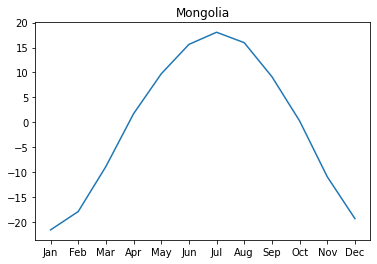

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan -23.917 -22.802 -16.925 -19.583 -20.021 -23.067 -19.961 -18.604   
1    Feb -17.416 -17.101 -12.920 -15.409 -13.055 -23.682 -15.896 -10.358   
2    Mar  -5.877  -6.487  -5.354  -8.311  -7.930  -7.418  -5.984  -6.578   
3    Apr   3.525   3.114   2.030   2.563   5.607   3.769   1.508   4.084   
4    May  12.562  11.613  11.621  10.187  11.341  10.078   9.507  12.322   
5    Jun  18.432  18.355  17.801  16.953  17.556  16.887  16.250  18.405   
6    Jul  20.212  19.810  20.663  17.826  19.218  19.984  18.485  20.716   
7    Aug  17.003  18.166  18.849  15.006  16.168  17.646  17.485  17.878   
8    Sep  11.285  11.392  10.373  10.695   9.181  10.642  10.893  12.233   
9    Oct  -2.020   2.197  -1.065   1.051   1.516   2.308   2.920   0.029   
10   Nov -14.187  -7.942 -10.853 -11.853  -9.065  -8.322  -7.450  -8.162   
11   Dec -17.502 -21.311 -21.069 -18.568 -17.428 -20.503 -16.334 -17.058   

      2008 

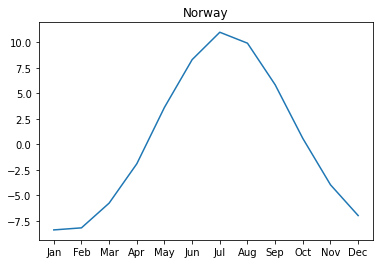

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -5.199  -5.682  -7.075 -10.129  -9.246  -4.196  -4.737  -6.364   
1    Feb  -5.742  -9.143  -6.012  -6.062  -7.470  -5.602  -6.666  -8.536   
2    Mar  -4.940  -8.153  -5.003  -3.906  -3.091  -6.214  -8.382  -1.376   
3    Apr  -1.285  -2.182   1.167  -0.544   1.536  -0.014   0.334   0.007   
4    May   5.136   4.026   5.955   4.414   5.022   3.541   5.446   4.378   
5    Jun   7.551   8.676  10.462   9.198   8.085   8.533   9.512  10.065   
6    Jul  10.798  11.339  12.139  13.484  11.671  12.429  12.577  11.609   
7    Aug   9.665  10.364  13.184  11.134  11.588  10.485  12.329  10.560   
8    Sep   6.753   7.273   6.678   6.489   6.914   6.571   8.260   5.543   
9    Oct   4.473   2.402  -0.907  -0.254   1.415   2.399   1.445   2.577   
10   Nov  -0.128  -3.507  -5.722  -1.936  -4.252  -0.866  -1.207  -3.021   
11   Dec  -5.519  -6.983  -8.417  -6.488  -3.873  -5.378  -1.831  -4.423   

      2008 

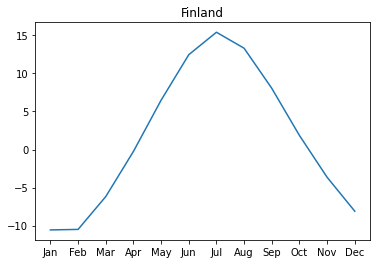

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -7.652  -5.340  -9.321 -15.640 -10.150  -5.392  -8.166  -8.254   
1    Feb  -6.893 -11.725  -5.567  -7.127  -9.209  -8.385 -12.048 -14.805   
2    Mar  -4.161  -8.488  -4.089  -2.507  -3.984  -8.326  -9.870  -0.431   
3    Apr   1.890   1.694   2.563  -0.203   1.633   1.554   1.845   1.813   
4    May   8.037   6.341   8.977   8.124   7.348   6.774   8.176   7.553   
5    Jun  12.702  13.586  14.623  11.349  11.679  13.121  14.079  13.095   
6    Jul  16.053  17.230  17.304  18.967  16.172  17.249  15.992  15.356   
7    Aug  13.451  13.681  15.749  13.882  14.090  14.735  16.196  14.986   
8    Sep   8.225   9.919   7.949   8.935   9.755   9.631  10.066   8.125   
9    Oct   6.017   3.478  -1.389   1.673   2.544   4.397   2.443   4.637   
10   Nov   0.444  -4.240  -7.500  -1.273  -3.891   1.079  -2.454  -3.167   
11   Dec  -5.025 -10.993 -12.537  -6.182  -4.610  -7.674  -1.553  -1.800   

      2008 

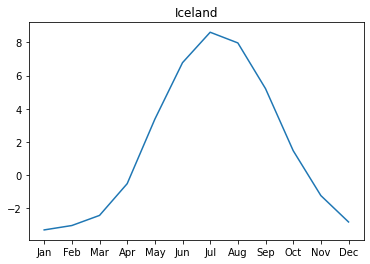

   Month   2000   2001   2002    2003    2004   2005   2006   2007   2008  \
0    Jan -1.950 -0.966 -1.778  -2.312  -3.305 -2.690 -0.696 -3.283 -3.047   
1    Feb -3.489 -2.592 -5.803  -0.121  -1.869 -1.365 -0.168 -2.756 -2.507   
2    Mar -2.513 -3.840 -3.203   1.033   1.372  0.130 -2.282 -0.468 -2.784   
3    Apr -1.713 -0.164  1.306   3.084   2.418  0.871 -0.565  2.161 -0.298   
4    May  4.398  4.279  3.758   3.513   4.345  2.721  2.939  2.780  5.213   
5    Jun  6.560  6.271  7.762   8.214   7.657  7.406  7.771  8.152  7.156   
6    Jul  9.681  8.550  8.841   9.791   9.833  9.857  8.936  9.040  9.820   
7    Aug  9.120  8.428  8.396  10.824  10.128  8.005  9.204  8.283  9.055   
8    Sep  6.539  6.671  7.083   6.439   6.925  3.523  6.989  5.234  7.302   
9    Oct  2.313  3.326  2.572   2.156   1.908  0.144  2.032  3.042  0.087   
10   Nov -1.071 -0.898  1.928   0.165  -0.868 -1.399 -1.936 -0.317 -0.382   
11   Dec -2.636 -0.686  1.128  -2.696  -3.163 -0.799 -0.034 -1.131 -1.860   

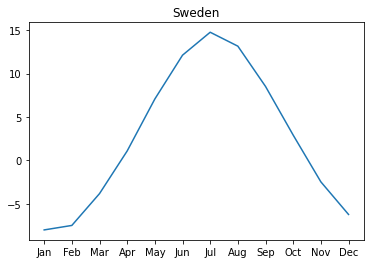

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -4.812  -4.518  -6.332  -9.840  -8.538  -3.449  -6.173  -5.990   
1    Feb  -4.329  -8.968  -3.282  -5.601  -5.668  -6.008  -6.857  -8.404   
2    Mar  -2.352  -6.184  -2.101  -0.345  -1.992  -4.920  -7.538   0.594   
3    Apr   2.762   1.407   3.724   1.725   3.601   3.129   1.956   3.684   
4    May   9.121   7.594   9.874   8.174   8.254   6.890   8.395   8.042   
5    Jun  11.649  12.607  14.762  12.918  11.634  12.180  13.620  13.850   
6    Jul  14.331  15.651  16.197  17.718  14.435  16.474  16.678  14.852   
7    Aug  13.012  13.714  17.054  14.162  14.711  13.811  16.145  14.147   
8    Sep   8.805   9.623   9.367   9.520   9.765   9.956  11.567   8.284   
9    Oct   6.548   5.197   0.187   1.561   3.528   4.903   4.193   4.481   
10   Nov   2.012  -1.323  -4.859  -0.973  -2.852   0.663   0.344  -2.081   
11   Dec  -3.695  -7.124  -9.047  -4.223  -3.105  -5.627  -0.080  -2.492   

      2008 

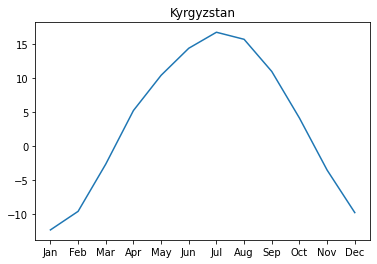

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -9.115 -11.644  -9.332  -8.452  -8.992 -10.480 -14.578  -9.829   
1    Feb  -8.416  -7.015  -6.445  -6.842  -5.201 -11.520  -5.127  -4.645   
2    Mar  -1.126   1.195   1.345  -2.329  -0.012   1.434   0.999  -0.967   
3    Apr   8.007   6.593   5.334   3.181   6.438   6.377   6.976   8.969   
4    May  12.970  13.845  10.075   9.314  11.379  10.344  12.340  11.880   
5    Jun  15.511  17.083  15.039  14.385  15.663  16.348  15.317  16.287   
6    Jul  17.632  16.748  16.213  16.660  16.728  18.230  16.898  17.168   
7    Aug  17.033  15.899  17.272  16.156  16.125  15.185  17.351  16.379   
8    Sep  12.219  10.790  11.657  12.219  12.197  13.417  11.583  12.332   
9    Oct   2.814   4.242   6.875   5.651   4.028   5.739   7.488   3.295   
10   Nov  -3.541  -0.300  -0.246  -2.498   0.071  -2.146  -0.771  -0.470   
11   Dec  -7.219 -10.064 -11.279  -8.937  -8.073  -8.711  -9.468  -9.760   

      2008 

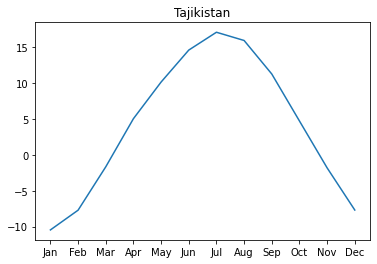

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -7.631 -10.171  -8.127  -6.631  -7.138  -8.672 -12.021  -8.978   
1    Feb  -7.620  -5.853  -5.579  -5.335  -3.749  -8.482  -3.798  -4.622   
2    Mar  -0.938   1.166   1.483  -1.598   1.296   2.018   1.033  -0.707   
3    Apr   7.964   7.721   5.452   4.303   6.086   5.831   6.485   8.542   
4    May  13.296  13.975  10.065   8.641  11.494   9.331  13.328  11.388   
5    Jun  15.457  17.014  15.278  14.559  15.858  16.038  15.835  16.302   
6    Jul  17.881  17.385  16.685  18.008  17.058  18.099  17.534  17.356   
7    Aug  17.239  16.189  17.186  16.334  16.593  15.600  17.278  16.527   
8    Sep  12.379  11.290  11.597  12.262  12.732  13.770  11.958  12.270   
9    Oct   4.645   5.412   7.949   6.409   4.386   6.123   8.134   3.906   
10   Nov  -1.652   0.723   0.707  -1.088   1.482  -1.015  -0.189   0.787   
11   Dec  -6.309  -6.233  -9.201  -7.182  -6.041  -6.427  -9.201  -7.477   

      2008 

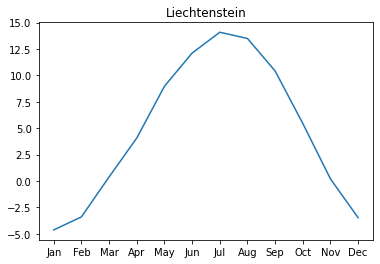

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -4.868  -3.162  -3.931  -4.680  -4.448  -4.343  -6.392  -0.093   
1    Feb  -0.576  -1.221   1.004  -6.124  -2.183  -6.313  -4.136   0.666   
2    Mar   1.643   3.165   2.783   2.665   0.239   0.569  -1.351   2.046   
3    Apr   6.435   3.132   4.681   4.774   5.343   5.439   5.027   9.155   
4    May  11.552  11.961  10.197  11.492   7.934  10.098   9.761  11.114   
5    Jun  14.455  11.468  15.438  17.928  12.582  14.181  14.011  14.270   
6    Jul  12.431  15.037  14.735  15.947  14.372  14.626  18.415  14.824   
7    Aug  15.534  15.761  14.188  18.436  15.211  12.578  11.390  13.769   
8    Sep  11.110   7.897   8.970  10.563  11.200  11.750  13.638   8.988   
9    Oct   6.793   9.361   5.790   2.787   7.758   7.286   8.922   5.384   
10   Nov   1.787  -0.905   2.555   2.262   0.254  -0.394   2.917  -1.225   
11   Dec  -0.351  -5.433  -1.246  -2.554  -3.097  -5.321  -0.908  -3.547   

      2008 

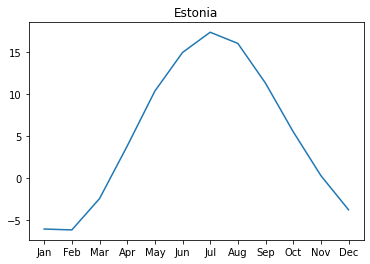

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -3.044  -1.946  -2.947  -8.003  -7.323  -1.538  -5.737  -1.685   
1    Feb  -1.483  -5.562  -0.345  -6.017  -4.328  -6.442  -8.609  -9.376   
2    Mar  -0.136  -2.491   1.292  -1.088  -0.350  -5.709  -4.976   3.825   
3    Apr   7.943   6.472   5.830   2.932   5.434   4.703   4.768   5.298   
4    May  11.009  10.502  12.963  11.280  10.575  10.863  11.165  12.037   
5    Jun  14.569  14.596  16.471  13.806  13.818  14.656  16.335  16.316   
6    Jul  16.900  20.998  19.523  20.347  17.059  18.917  19.214  17.459   
7    Aug  15.890  16.668  18.923  16.318  17.535  16.837  18.023  18.623   
8    Sep  10.152  12.369  11.680  12.112  12.724  13.310  14.373  11.857   
9    Oct   8.539   7.870   1.424   4.244   6.284   7.447   8.449   6.776   
10   Nov   3.694   0.088  -1.367   2.445   0.113   2.872   2.359   0.136   
11   Dec   0.072  -7.888  -8.908  -0.430  -0.251  -3.899   3.018   0.704   

      2008 

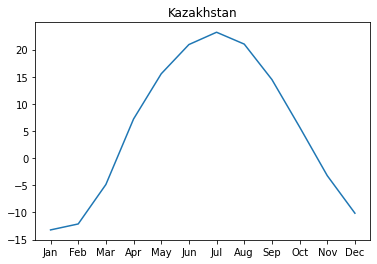

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan -10.206 -11.574  -5.823 -10.171 -10.651 -11.897 -18.893  -6.714   
1    Feb  -7.225 -10.019  -3.633 -10.979  -6.056 -14.908  -8.240  -7.728   
2    Mar  -2.040   0.886   2.996  -5.539  -1.268  -0.233   0.885  -3.973   
3    Apr  11.876   9.355   6.457   5.753   7.657   8.931   9.627   9.709   
4    May  14.663  18.837  13.887  16.174  17.469  17.504  16.114  16.891   
5    Jun  21.808  21.499  19.716  19.787  22.111  22.514  23.306  20.977   
6    Jul  23.695  22.233  23.178  21.821  23.066  24.563  22.191  23.867   
7    Aug  22.670  21.300  21.822  23.139  21.570  20.981  22.138  22.696   
8    Sep  14.680  13.914  16.603  16.049  16.117  16.508  15.453  16.051   
9    Oct   3.440   5.334   7.228   7.751   7.078   8.271   7.395   6.688   
10   Nov  -5.162   0.471   0.223  -2.953   0.715  -0.531  -1.007  -2.025   
11   Dec  -7.062 -10.479 -15.035  -7.255  -9.092  -7.717  -6.531 -10.577   

      2008 

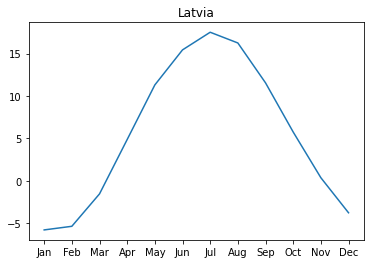

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -2.932  -1.903  -2.567  -6.491  -7.350  -1.329  -6.706  -0.638   
1    Feb  -0.395  -4.353   0.654  -5.699  -3.447  -6.043  -7.522  -8.440   
2    Mar   0.870  -0.918   2.271  -0.046   0.665  -4.520  -3.583   4.806   
3    Apr   9.597   7.498   6.792   4.117   6.437   6.055   5.701   5.879   
4    May  11.984  11.617  14.243  12.754  10.924  11.632  11.937  13.107   
5    Jun  15.134  14.934  16.891  14.796  14.346  15.190  16.604  17.313   
6    Jul  16.763  21.324  20.080  20.489  17.181  19.050  20.046  17.406   
7    Aug  16.009  17.260  19.368  16.667  17.927  16.847  18.008  18.719   
8    Sep  10.217  12.161  12.116  12.344  12.719  13.679  14.416  12.159   
9    Oct   8.798   7.993   2.436   4.320   6.741   7.260   8.823   6.785   
10   Nov   3.918   0.507  -0.248   2.392   0.008   2.271   2.950   0.166   
11   Dec   0.002  -7.649  -9.025  -0.316  -0.142  -3.598   2.973   0.085   

      2008 

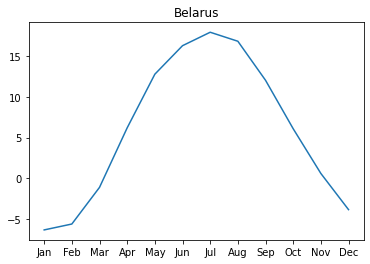

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -4.353  -2.173  -3.090  -5.616  -6.662  -1.384  -8.192   0.448   
1    Feb  -0.541  -4.070   1.643  -7.048  -3.908  -6.487  -8.342  -7.540   
2    Mar   1.260   0.253   3.421  -0.232   1.647  -3.512  -2.922   5.490   
3    Apr  11.054   9.485   8.081   5.333   7.073   8.084   7.324   6.680   
4    May  13.293  12.710  15.032  15.810  11.482  13.555  12.832  15.162   
5    Jun  16.129  15.444  17.211  15.631  15.348  15.768  17.092  18.416   
6    Jul  17.272  22.239  21.766  20.246  18.147  19.528  20.188  18.100   
7    Aug  17.235  18.296  19.238  17.217  18.620  17.452  18.018  19.604   
8    Sep  10.507  12.269  12.249  12.333  12.734  14.207  14.030  12.808   
9    Oct   8.705   8.085   4.715   5.055   7.867   7.485   8.517   7.245   
10   Nov   4.164   1.021   1.692   2.969   0.808   1.620   2.978  -0.202   
11   Dec   0.193  -8.452  -9.535  -0.999  -0.286  -2.699   2.382  -1.073   

      2008 

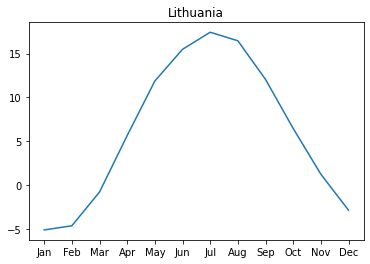

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -2.503  -1.350  -1.829  -5.335  -7.185  -0.583  -7.296   0.731   
1    Feb   0.539  -3.143   1.695  -5.611  -2.453  -5.426  -6.522  -6.789   
2    Mar   1.666  -0.029   3.019   0.631   1.392  -3.452  -3.024   5.321   
3    Apr  10.732   7.924   7.549   4.959   7.093   7.073   6.444   6.544   
4    May  12.877  12.412  15.337  13.535  10.959  12.114  12.370  13.704   
5    Jun  15.423  14.548  16.773  15.365  14.392  15.149  16.492  17.651   
6    Jul  16.325  21.088  20.300  20.193  16.896  18.999  20.668  17.227   
7    Aug  16.213  17.794  19.796  17.050  18.201  16.770  17.965  18.780   
8    Sep  10.447  12.154  12.556  12.783  12.900  14.280  14.749  12.700   
9    Oct   9.633   8.816   4.170   4.638   7.908   7.769   9.423   7.271   
10   Nov   5.073   1.564   1.435   3.401   1.175   2.651   4.130   0.761   
11   Dec   0.867  -6.333  -8.328   0.355   0.746  -2.292   3.665   0.347   

      2008 

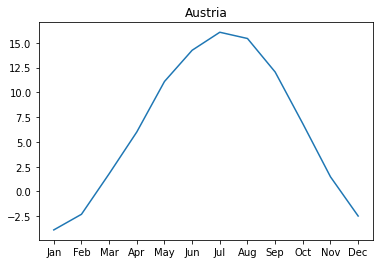

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -4.598  -2.438  -3.424  -3.781  -4.173  -2.775  -6.262   1.325   
1    Feb   0.896   0.028   2.234  -4.949  -0.775  -4.726  -3.009   2.099   
2    Mar   3.068   4.477   4.017   3.400   1.355   0.994   0.098   4.093   
3    Apr   9.160   5.548   6.517   6.154   7.450   7.286   7.314  10.129   
4    May  13.570  13.903  13.534  13.955  10.130  12.238  11.521  13.140   
5    Jun  16.544  13.598  17.192  19.066  14.406  15.518  15.630  16.641   
6    Jul  14.867  17.129  17.357  17.866  16.256  16.729  19.810  17.422   
7    Aug  17.771  17.859  16.637  20.005  16.967  14.810  13.915  16.225   
8    Sep  12.455  10.040  11.013  12.094  12.425  13.266  14.806  10.505   
9    Oct   9.263  10.382   6.873   4.405   8.805   8.319   9.613   6.467   
10   Nov   4.150   0.667   4.562   3.713   2.070   1.016   3.927   0.396   
11   Dec  -0.127  -4.926  -1.529  -1.816  -2.043  -3.361  -0.032  -2.724   

      2008 

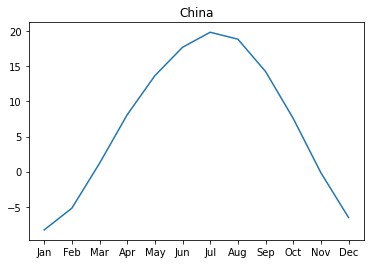

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -8.254  -7.728  -5.917  -7.209  -7.354  -7.648  -7.002  -6.791   
1    Feb  -5.539  -3.809  -1.720  -2.805  -2.744  -5.730  -3.224  -1.177   
2    Mar   2.196   2.478   3.860   2.331   3.138   2.237   2.530   2.673   
3    Apr   8.840   8.556   9.195   9.037  10.284   9.581   8.887   9.246   
4    May  15.253  14.723  14.157  13.892  14.171  14.079  14.524  15.426   
5    Jun  18.493  18.593  18.738  18.086  18.159  19.030  18.417  18.807   
6    Jul  20.942  20.833  20.319  19.766  19.886  20.465  20.615  20.174   
7    Aug  19.080  19.096  19.284  18.971  18.757  18.861  20.066  19.787   
8    Sep  14.741  15.011  14.272  15.089  14.795  15.706  14.797  14.989   
9    Oct   7.386   8.746   7.477   8.142   7.661   8.201   9.595   8.053   
10   Nov  -0.764   1.406   0.246   0.534   1.002   1.359   1.694   1.012   
11   Dec  -5.517  -6.748  -6.363  -5.570  -5.202  -7.179  -5.523  -4.678   

      2008 

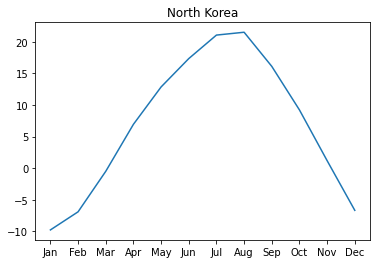

   Month    2000    2001    2002    2003    2004    2005    2006    2007  \
0    Jan  -9.723 -11.379  -6.126  -9.171  -7.749  -8.572  -8.002  -6.322   
1    Feb  -7.505  -6.457  -2.545  -3.331  -2.995  -7.891  -5.833  -1.323   
2    Mar   1.241  -0.082   3.505   1.285   0.900  -0.752   0.540   1.015   
3    Apr   7.308   8.820   9.160   8.979   9.090   8.683   6.118   7.169   
4    May  13.551  15.002  14.747  14.623  13.893  12.542  14.202  14.025   
5    Jun  19.528  19.146  17.955  18.536  19.727  18.642  17.448  19.590   
6    Jul  22.919  22.438  21.406  20.343  21.215  21.879  20.787  20.704   
7    Aug  22.800  21.815  20.913  20.760  21.477  22.166  23.225  22.260   
8    Sep  16.496  17.214  16.796  17.076  17.196  17.590  16.741  17.585   
9    Oct   9.263  11.432   7.727   9.322   9.916   9.932  12.108  10.005   
10   Nov   0.526   1.902  -2.054   3.002   3.841   3.153   2.631   1.534   
11   Dec  -6.104  -7.126  -6.375  -4.772  -5.183  -9.670  -4.681  -4.108   

      2008 

In [10]:
for c in data:
    graph_generator(c).to_csv(f'{c}.csv')